<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/Radiobuttons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RadioButtons(description='Acción:', index=4, options=('Selecciona una acción', 'Senoidal', 'Cuadrada', 'Triang…

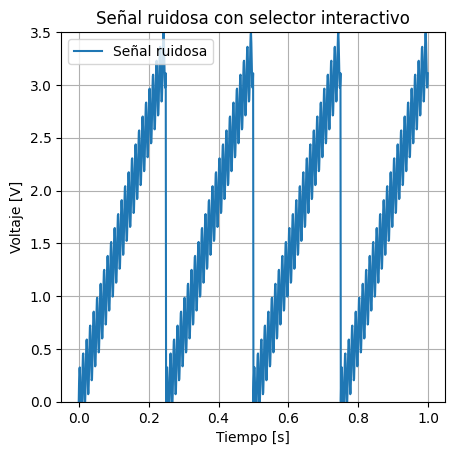

In [31]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros generales
fs = 1000  # Hz
t = np.linspace(0, 1, fs, endpoint=False)
amplitud = 1.65
frecuencia = 4
amplitud_ruido = 0.3
frecuencia_ruido = 100
ruido = amplitud_ruido * np.sin(2 * np.pi * frecuencia_ruido * t)

# Crear botones de radio
opciones = widgets.RadioButtons(
    options=['Selecciona una acción', 'Senoidal', 'Cuadrada', 'Triangular', 'Diente de sierra'],
    value='Selecciona una acción',
    description='Acción:',
    disabled=False
)

# Función para ejecutar la acción según la opción seleccionada
def ejecutar_accion(cambio=None):
    clear_output(wait=True)  # Borra la salida anterior antes de mostrar la nueva
    display(opciones)  # Se vuelve a mostrar el widget después de limpiar la salida

    #seleccion = cambio['new']
    seleccion = opciones.value

    if seleccion == 'Senoidal':
        senal_base = amplitud * np.sin(2 * np.pi * frecuencia * t)
    elif seleccion == 'Cuadrada':
        senal_base = amplitud * signal.square(2 * np.pi * frecuencia * t)
    elif seleccion == 'Triangular':
        senal_base = amplitud * signal.sawtooth(2 * np.pi * frecuencia * t, width=0.5)
    elif seleccion == 'Diente de sierra':
        senal_base = amplitud * signal.sawtooth(2 * np.pi * frecuencia * t, width=1.0)

    # Crear figura y señal inicial
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.3)
    senal_ruidosa = senal_base + ruido + 1.65
    linea, = ax.plot(t, senal_ruidosa, label='Señal ruidosa')
    ax.set_ylim(0, 3.5)
    ax.set_title("Señal ruidosa con selector interactivo")
    ax.set_xlabel("Tiempo [s]")
    ax.set_ylabel("Voltaje [V]")
    ax.grid(True)
    ax.legend()


# Detectar cambios en los botones de radio
opciones.observe(ejecutar_accion, names='value')

# Ejecutar la acción inicial manualmente
#ejecutar_accion()

# Mostrar los botones de radio
display(opciones)
